In [31]:
import pandas
import cobra
import os
from tqdm import tqdm
import numpy
import matplotlib.pyplot as plt


directory = "./thauera-files/ThaueraPaper/"


sampling_dir = "OptimalHeterotrophic/"
# sampling_dir = "OptSolarom/"


# ranks_dir = "ranks/"
ranks_dir = "ranks-simplified/"

In [32]:
log_format = '%(asctime)s %(message)s' #%(clientip)-15s %(user)-8s
import logging
from coralme.builder.main import ListHandler
log = logging.getLogger()
logging.basicConfig(filename = "./tmp.log", filemode = 'w', level = logging.WARNING, format = log_format)
logging.captureWarnings(True)

### Run

In [33]:
model = pandas.read_excel(directory + "ModelThauera.xls")
model["Subsystem"].head()

0    Cofactor and Prosthetic Group Biosynthesis
1    Cofactor and Prosthetic Group Biosynthesis
2    Cofactor and Prosthetic Group Biosynthesis
3    Cofactor and Prosthetic Group Biosynthesis
4            Purine and Pyrimidine Biosynthesis
Name: Subsystem, dtype: object

In [34]:
Sampling = pandas.DataFrame()
samples = []
for file in os.listdir(directory+sampling_dir):
    if "csv" not in file:
        continue
    met = file.split(".csv")[0]
    df = pandas.read_csv(directory+sampling_dir+file,header=None)

    # Full
    # Sampling[met] = df.stack()

    # Simplified
    Sampling[met] = df.std(axis=1)
    samples.append(met)

In [35]:
# Full
# Sampling = pandas.concat([Sampling.reset_index().set_index("level_0"),model["Subsystem"]],axis=1).reset_index()

In [36]:
# Simplified
Sampling = pandas.concat([Sampling,model["Subsystem"]],axis=1).reset_index()[samples+["Subsystem"]]

In [37]:
Sampling.to_csv(sampling_dir+"Sampling-std.csv")

In [38]:
df = Sampling.groupby("Subsystem").sum()
# df = -numpy.log10(df)

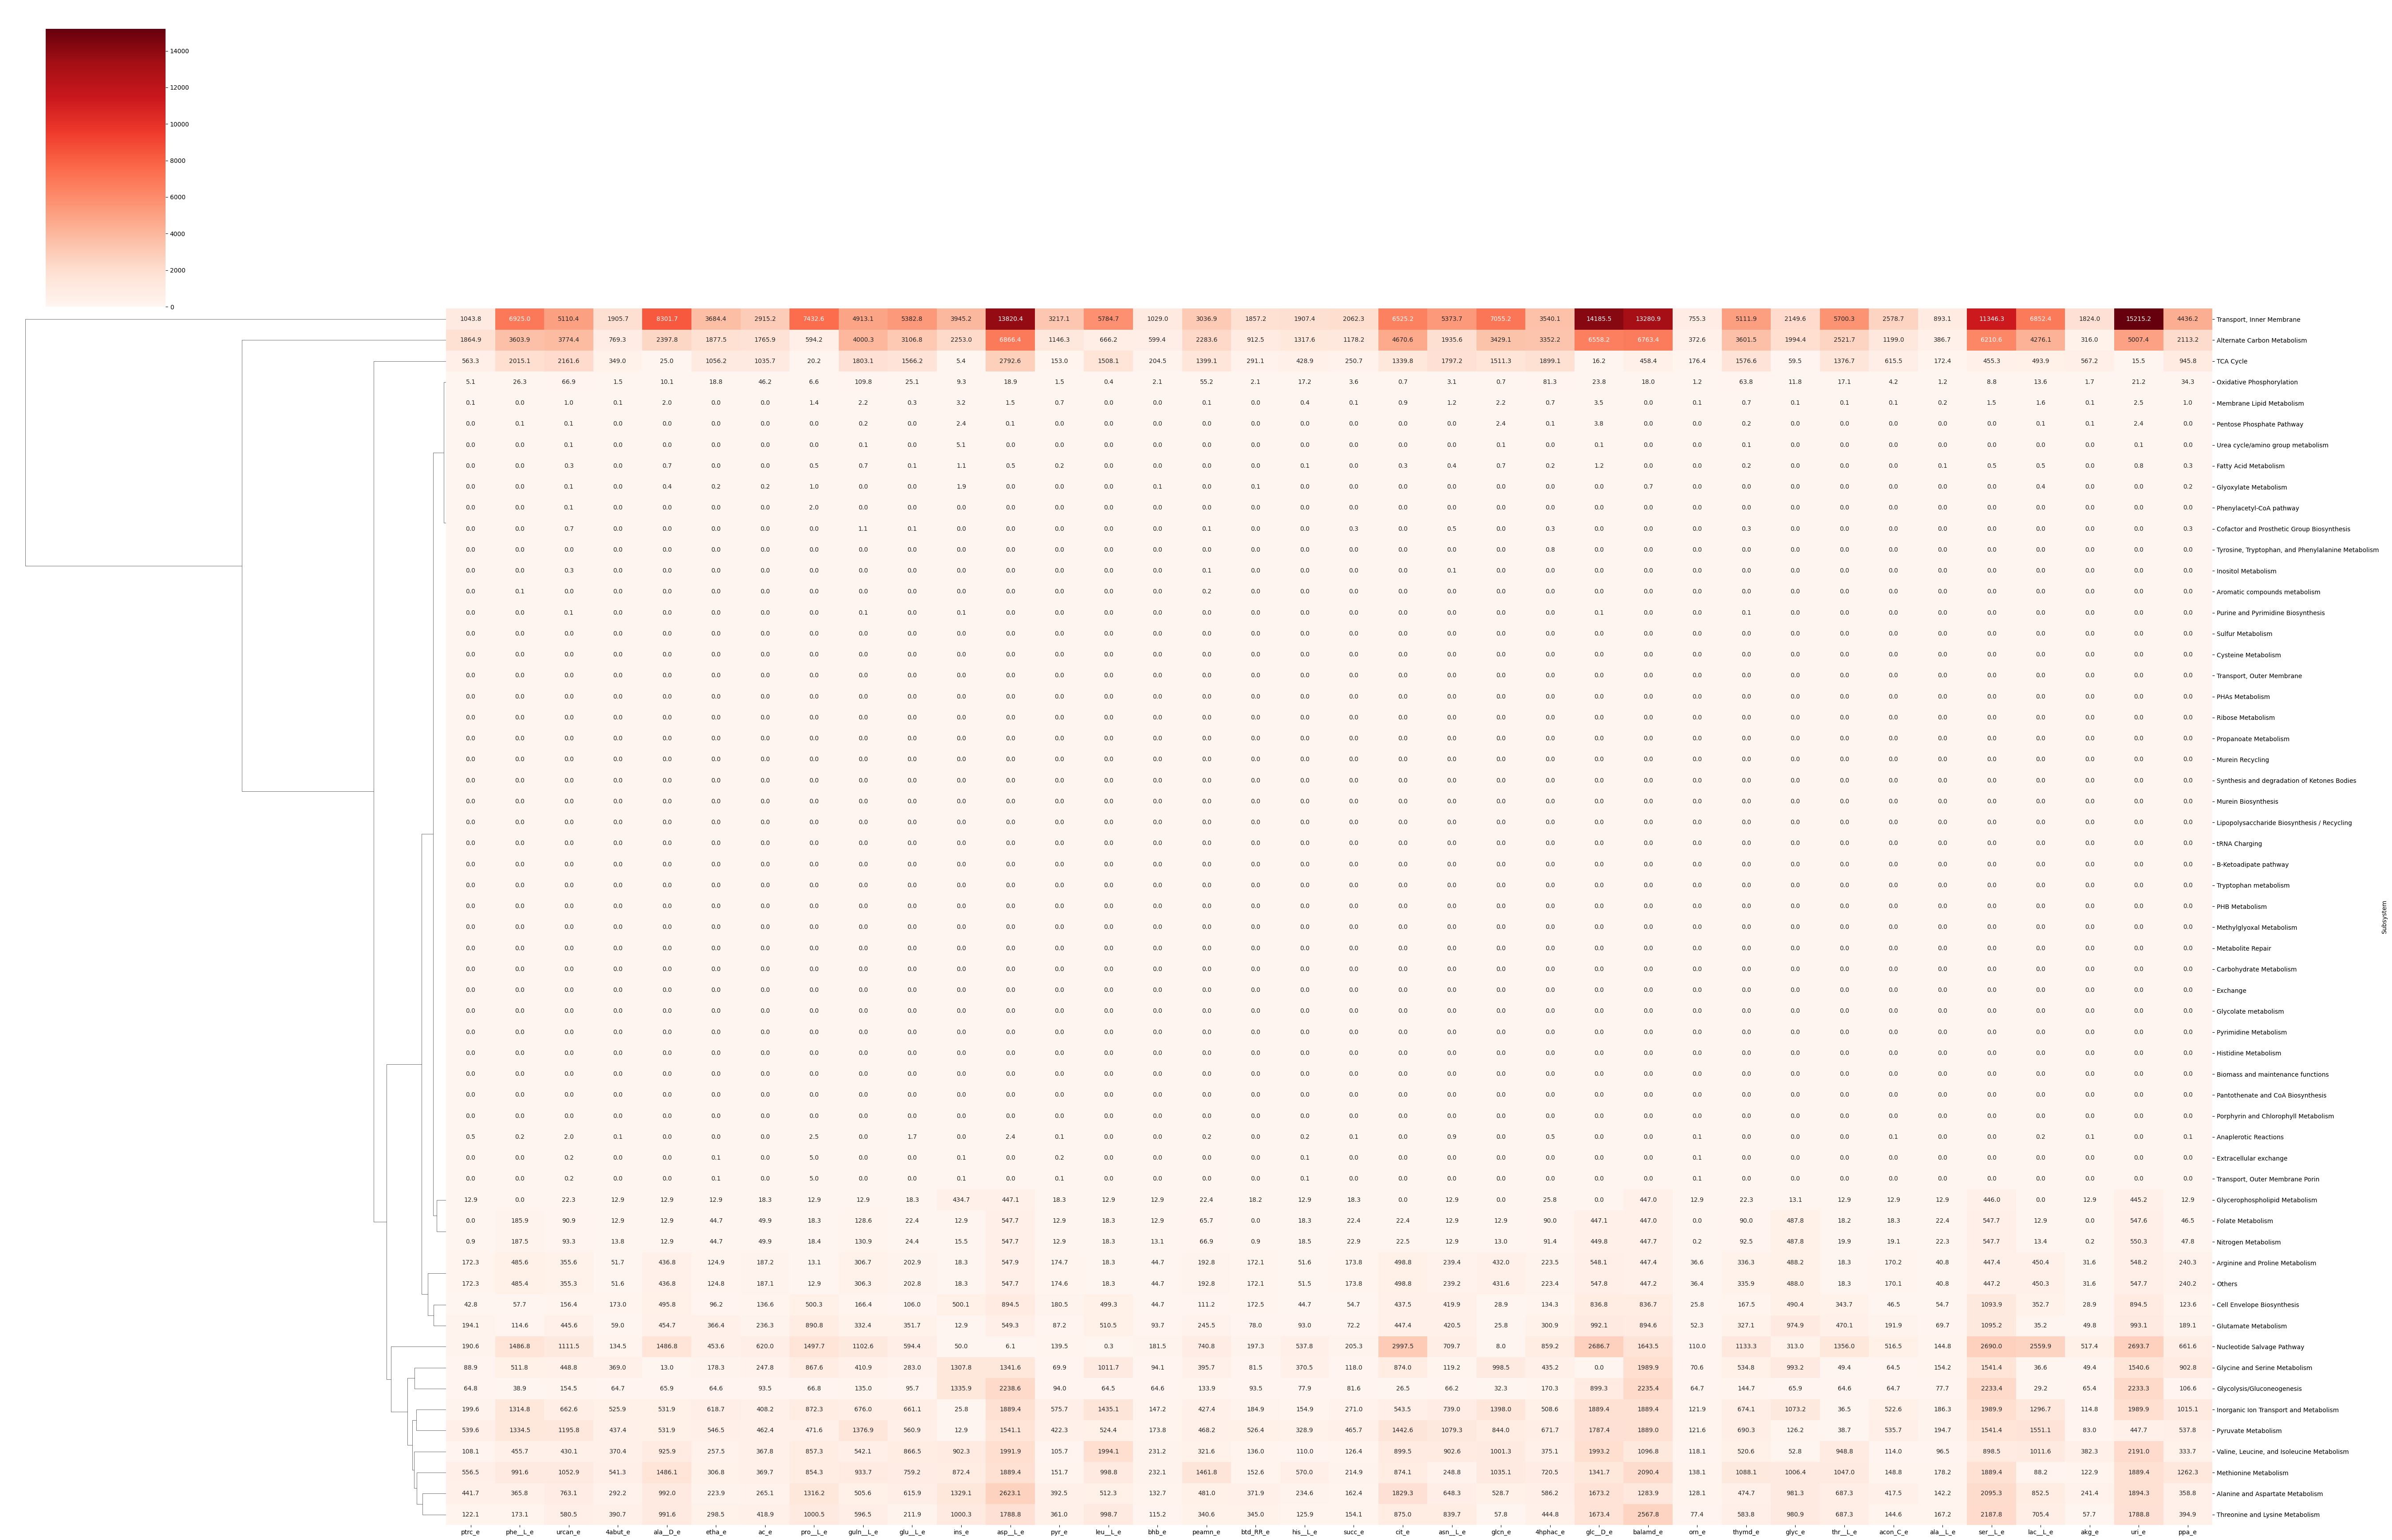

In [39]:
import seaborn as sns
cmap_df = df
cmap = plt.cm.get_cmap('Reds').copy()
cmap.set_under('white')
vmin,vmax = (1.0,2)
cmap = sns.clustermap(cmap_df,
               row_cluster=True,
               col_cluster=False,
               # vmin=vmin,
               # vmax=vmax,
               annot=True,
               fmt=".1f",
               cmap=cmap,
               # annot_kws={'rotation': 90}
               figsize=(1.5*cmap_df.shape[1],(0.6)*cmap_df.shape[0]),
               # cbar=False,
              )
labels = [i.get_text() for i in cmap.ax_heatmap.yaxis.get_majorticklabels()]
plt.savefig(sampling_dir+"StdDev.svg",format="SVG")